
# Decision Trees and Random Forests in Python

This is the code for the lecture video which goes over tree methods in Python. Reference the video lecture for the full explanation of the code!

A [blog post](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411#.hh7n1co54) explaining the general logic of decision trees and random forests which you can check out. 

## Import Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [27]:
df = pd.read_csv("kyphosis.csv")

In [28]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


## EDA

We'll just check out a simple pairplot for this small dataset.

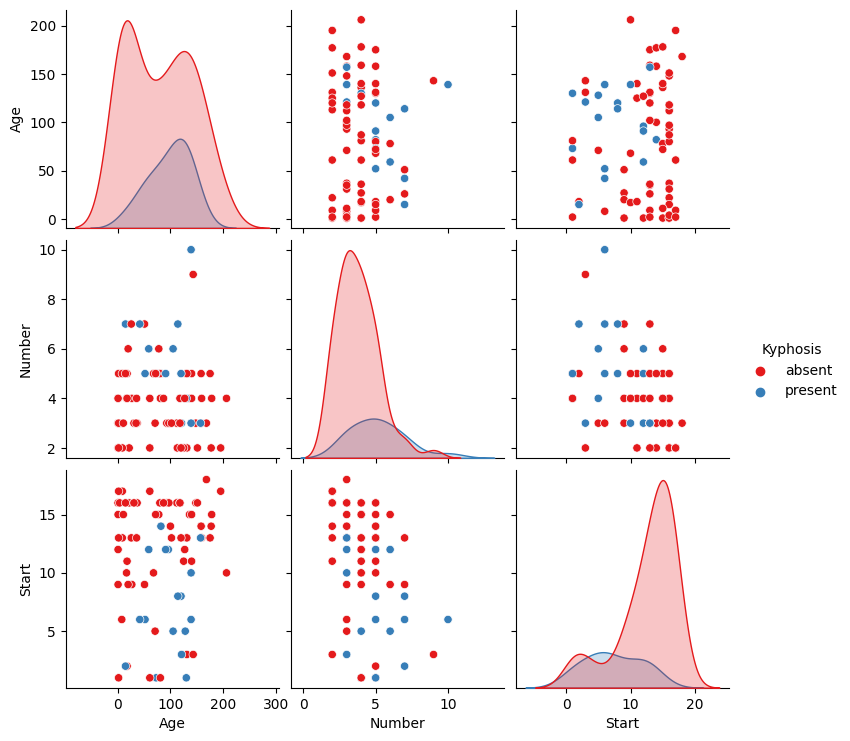

In [29]:
sns.pairplot(df,hue="Kyphosis",palette="Set1")

## Train Test Split

Let's split up the data into a training set and a test set!

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop("Kyphosis",axis=1)
y = df["Kyphosis"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Decision Trees

We'll start just by training a single decision tree.

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtree = DecisionTreeClassifier()

In [35]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
y_pred = dtree.predict(X_test)

In [38]:
confusion_matrix(y_test,y_pred)

array([[13,  4],
       [ 6,  2]], dtype=int64)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      absent       0.68      0.76      0.72        17
     present       0.33      0.25      0.29         8

    accuracy                           0.60        25
   macro avg       0.51      0.51      0.50        25
weighted avg       0.57      0.60      0.58        25



## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [40]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

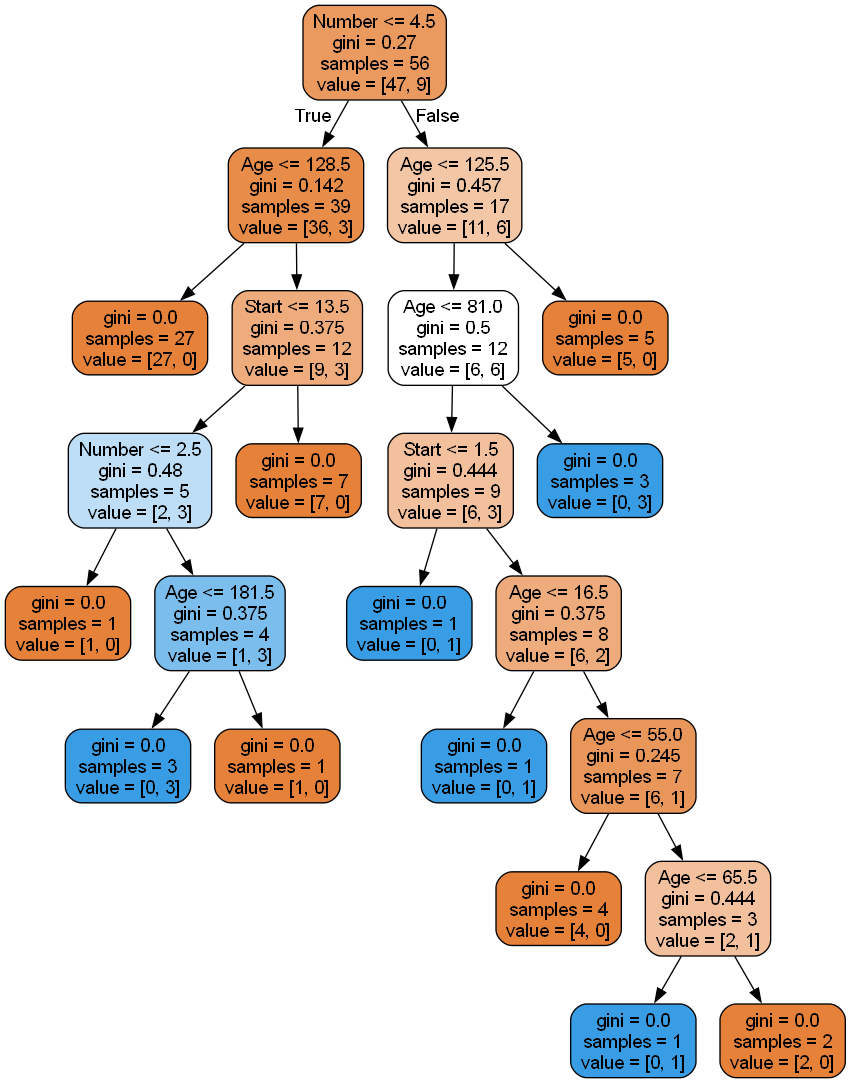

In [41]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forests

Now let's compare the decision tree model to a random forest.

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
random_forest = RandomForestClassifier(n_estimators=300)

In [51]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [52]:
y_pred = random_forest.predict(X_test)

In [53]:
confusion_matrix(y_test,y_pred)

array([[17,  0],
       [ 6,  2]], dtype=int64)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25

